## Image Loading and Preprocessing

Before machine learning is able to be utilized an image must be processed and converted to a numbered array.
Below I will be converting images to Numpy array and demonstrating varying image manipulation techniques on photos of dogs.

In [0]:

from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import numpy as np 
from PIL import Image


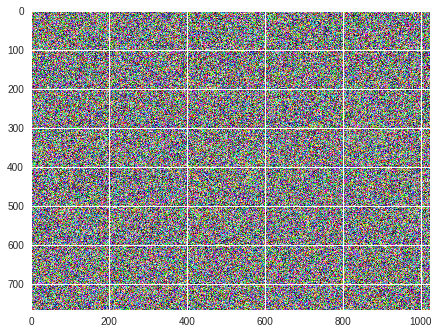

In [2]:
# Making sure the mic is working/ generating test_data
test_data = np.random.beta(1,1,size=(768,1024,3))
plt.imshow(test_data);

In [3]:
# Uploading dog images
from google.colab import files
uploaded = files.upload()

The image size is: (512, 384)


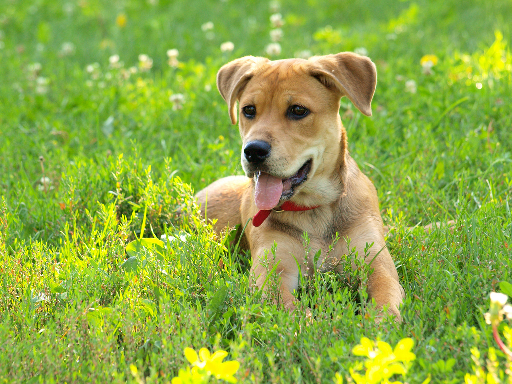

In [4]:
# Opening image

img = Image.open('dog1.jpg')
img = img.resize((512,384))
# Retrieving image size
img_size = img.size

print("The image size is: {}".format(img_size))

# Having the image as the last line in the cell will display it in the notebook
img

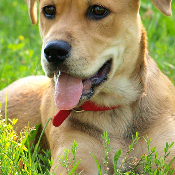

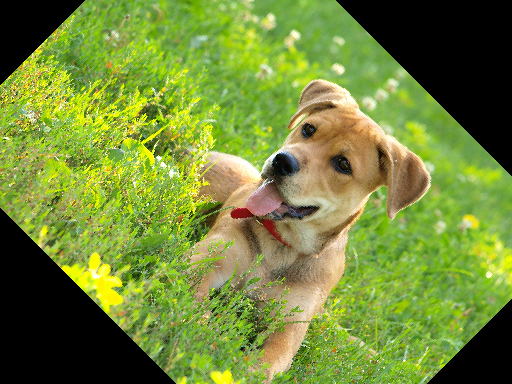

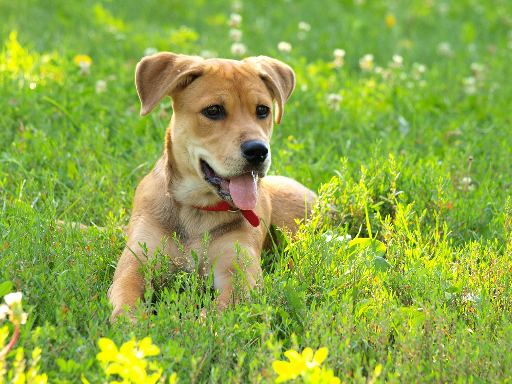

In [5]:
# Cropping image to 200,100,375,275 to focus in on the cute face.
img_cropped = img.crop((200,100,375,275))
display(img_cropped)

# Rotating image by -45 degrees
img_rotated = img.rotate(-45)
display(img_rotated)

# Flipping image left to right
img_flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
display(img_flipped)

Our NumPy array has the shape: (384, 512, 3)


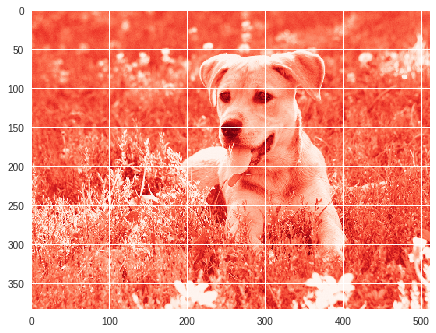

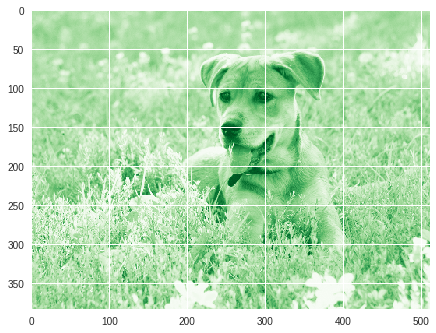

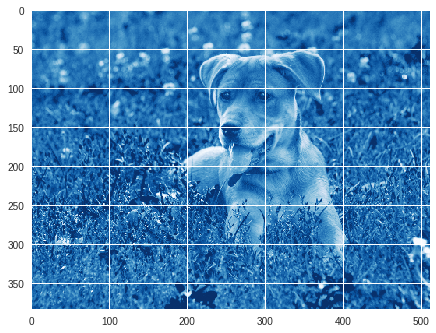

In [6]:
# Turning our image object into a NumPy array
img_data = np.asarray(img,dtype='uint8')

# Retrieving shape of the resulting array
img_data_shape = img_data.shape

print("Our NumPy array has the shape: {}".format(img_data_shape))

# Plotting data with `imshow` 
plt.show()

# Plotting red channel
plt.imshow(img_data[:,:,0], cmap=plt.cm.Reds_r)
plt.show()

# Plotting green channel
plt.imshow(img_data[:,:,1], cmap=plt.cm.Greens_r)
plt.show()

# Plotting blue channel
plt.imshow(img_data[:,:,2], cmap=plt.cm.Blues_r)
plt.show()

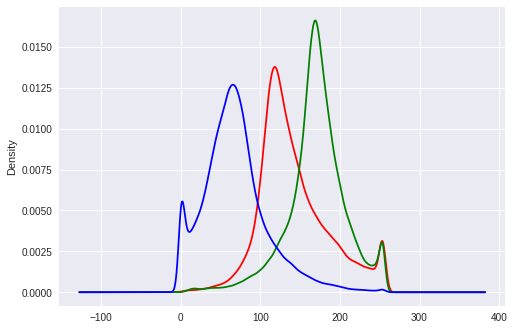

In [7]:
# Plotting a kernel density estimate.  This may look familiar from image editing apps
def plot_kde(channel, color):
    
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# Creating the list of channels
channels = ['r','g','b']
    
def plot_rgb(image_data):
    # Enumerating to loop over colors and indexes
    for ix, color in enumerate(channels):
        plot_kde(image_data[:,:,ix],color)
    plt.show()
    
plot_rgb(img_data)

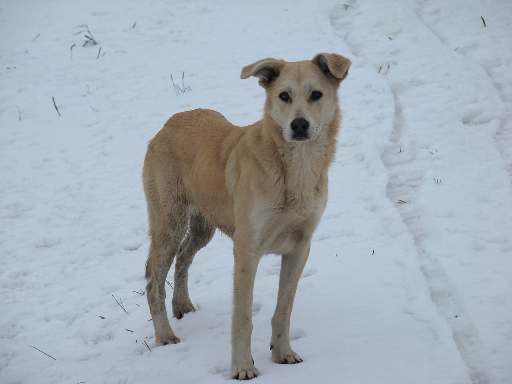

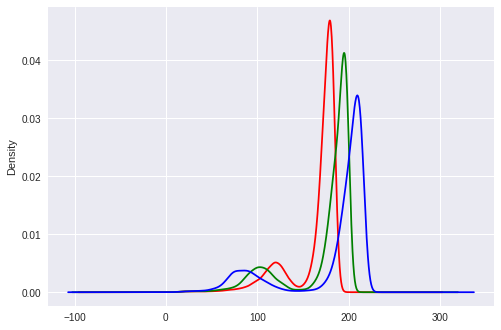

In [8]:
# Loading image object into variable dog
dog2 = Image.open('dog2.jpg')
dog2 = dog2.resize((512,384))
display(dog2)

# NumPy array of the dog image data

dog2_data = np.asarray(dog2,dtype='uint8')
# Plotting rgb densities for the dog image 2
plot_rgb(dog2_data)

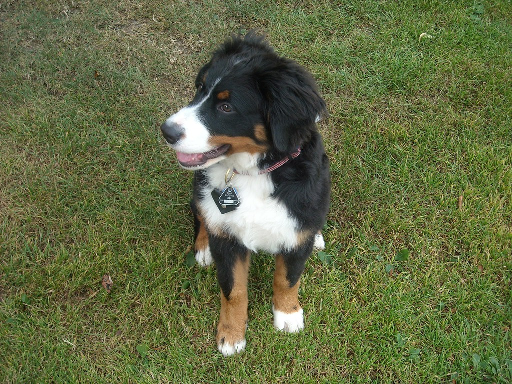

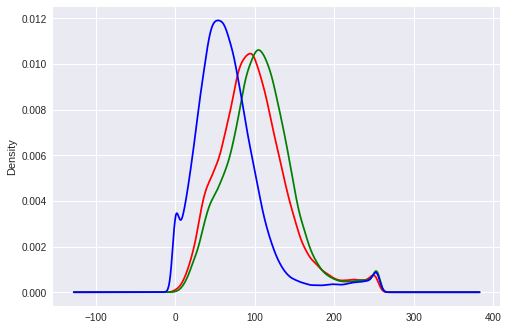

In [9]:
# Loading image object into variable dog
dog3 = Image.open('dog3.jpg')
dog3 = dog3.resize((512,384))
display(dog3)

# NumPy array of the dog image data
dog3_data = np.asarray(dog3,dtype='uint8')
# Plotting rgb densities for the dog image 3
plot_rgb(dog3_data)

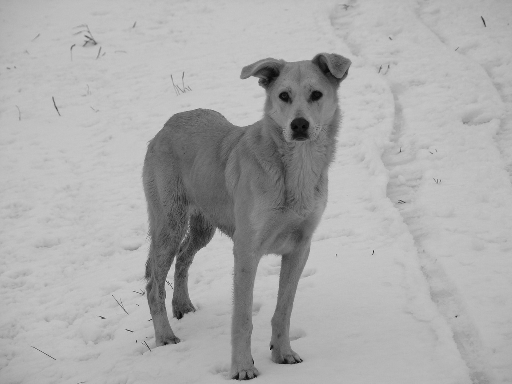

Our NumPy array has the shape: (384, 512)


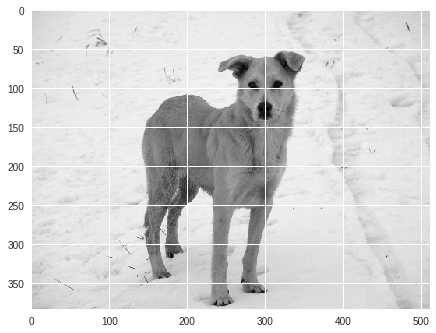

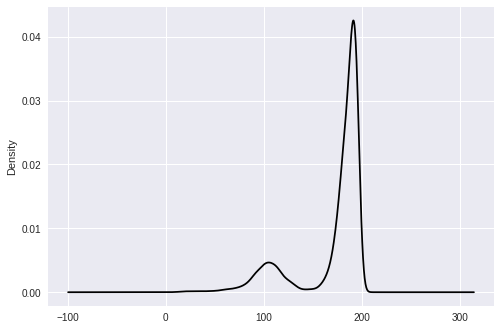

In [10]:
# Converting dog2 to grayscale
dog2_bw = dog2.convert('L')
display(dog2_bw)

# Converting image to a NumPy array
dog2_bw_arr = np.asarray(dog2_bw)

# Retrieving shape of the resulting array
dog2_bw_arr_shape = dog2_bw_arr.shape
print("Our NumPy array has the shape: {}".format(dog2_bw_arr_shape))

# Plotting array using matplotlib
plt.imshow(dog2_bw_arr, cmap=plt.cm.gray)
plt.show()

# Plotting the kde of the new black and white array
plot_kde(dog2_bw_arr, 'k');

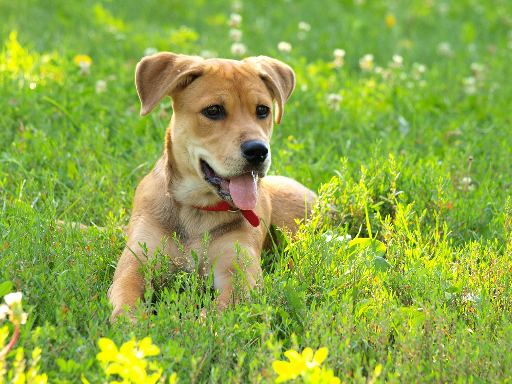

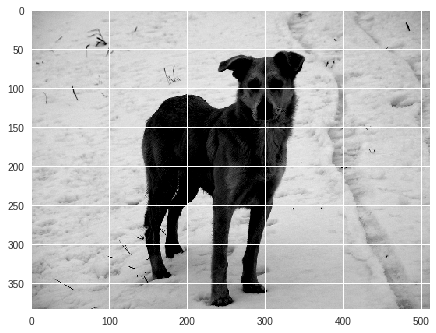

In [11]:
# Flipping and showing image left-right with transpose
dog2_bw_flip = img.transpose(Image.FLIP_LEFT_RIGHT)
display(dog2_bw_flip)

# Saving flipped image
dog2_bw_flip.save("bw_flipped.jpg")

# Creating a higher contrast by reducing range
dog2_hc_arr = np.maximum(100,dog2_bw_arr)

# Showing the higher contrast version
plt.imshow(dog2_hc_arr, cmap=plt.cm.gray)

# Converting NumPy array of high contrast to an Image
dog2_bw_hc = Image.fromarray(dog2_hc_arr)

# Saving high contrast version
dog2_bw_hc.save('bw_hc.jpg')